<a href="https://colab.research.google.com/github/BainbridgeArtisanResourceNetwork/barn-printer-logs/blob/master/Evaluate_3D_Printer_Logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

This is just a quick worksheet meant to evaluate the 3D printer usage in the lab over time. It will be expanded as we get more data.

It is intended to be run interactively, and will require your user credentials and permission to access the Sheet referenced.

You will also need to grant it permission to save files to your local Google Drive.

You have option of saving output as PDF to Google Drive or to download it to your local machine that's accessing this notebook.

## Setup, Authenticate, Load, and Examine Data

In [1]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
import matplotlib.pyplot as plt
from google.colab import drive, files


# this is intended for interactive use, and requires you to have access to the GSheet referenced by key below
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# this is the sheet currently named '3D Printer Logs' but using the key allows renaming
# we will load it, and reference the first sheet on it.
spreadsheet = gc.open_by_key('1b9-kxyAyj4OgdZiQ6g1DlAYptVnAV_MTv15vn384pGM')
worksheet = spreadsheet.get_worksheet(0)

# load all rows into a dataframe
df = pd.DataFrame(worksheet.get())

# Treat the first row as header
df.columns = df.iloc[0]
df = df.drop(0)

df.head(10)

,date,printer,filament (m),days,hours,minutes,power failures,filament runout,mmu fails,installed sheet,zlog offset,Notes
1,2024-10-31,Prusa 02,11491.69,380,17,5,,20,None,None,None,None
2,2024-10-31,Prusa 03,9760.87,988,12,57,23,43,None,None,None,None
3,2024-10-31,Prusa 04,3026.99,337,14,2,19,13,196,None,None,None
4,2024-10-31,Prusa 05,9031.69,333,14,2,44,41,None,None,None,None
5,2024-10-31,Prusa 06,,0,None,None,None,None,None,None,None,None
6,2024-10-31,Prusa 10 (R),756.5,4,6,,0,0,None,None,None,None
7,2024-10-31,Prusa 11 (L),383.1,1,17,,0,0,None,None,None,None
8,2024-11-09,Prusa 02,11494.25,380,18,13,0,20,None,None,None,None
9,2024-11-09,Prusa 03,9763.92,988,13,54,23,43,None,None,None,None
10,2024-11-09,Prusa 04,3026.99,337,14,2,19,13,196,None,None,None


## Data Preparation

In [2]:
# convert all times to hours
def convert_to_hours(row):
  h = row['hours']
  d = row['days']
  m = row['minutes']

  hours = round(h + (d * 24) + m/60, 1)
  return hours

In [3]:
# clean up the data and prep any additional columns

df['date'] = pd.to_datetime(df['date'])

numeric_cols = [
    'filament (m)',
    'days',
    'hours',
    'minutes',
    'power failures',
    'filament runout',
    'mmu fails',
]
for col in numeric_cols:
  df[col] = pd.to_numeric(df[col], errors="coerce")
  df[col] = df[col].fillna(0)

df['total_hours'] = df.apply(convert_to_hours, axis=1)

df.head(10)

,date,printer,filament (m),days,hours,minutes,power failures,filament runout,mmu fails,installed sheet,zlog offset,Notes,total_hours
1,2024-10-31,Prusa 02,11491.69,380,17.0,5.0,0.0,20.0,0.0,None,None,None,9137.1
2,2024-10-31,Prusa 03,9760.87,988,12.0,57.0,23.0,43.0,0.0,None,None,None,23725.0
3,2024-10-31,Prusa 04,3026.99,337,14.0,2.0,19.0,13.0,196.0,None,None,None,8102.0
4,2024-10-31,Prusa 05,9031.69,333,14.0,2.0,44.0,41.0,0.0,None,None,None,8006.0
5,2024-10-31,Prusa 06,0.00,0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0
6,2024-10-31,Prusa 10 (R),756.50,4,6.0,0.0,0.0,0.0,0.0,None,None,None,102.0
7,2024-10-31,Prusa 11 (L),383.10,1,17.0,0.0,0.0,0.0,0.0,None,None,None,41.0
8,2024-11-09,Prusa 02,11494.25,380,18.0,13.0,0.0,20.0,0.0,None,None,None,9138.2
9,2024-11-09,Prusa 03,9763.92,988,13.0,54.0,23.0,43.0,0.0,None,None,None,23725.9
10,2024-11-09,Prusa 04,3026.99,337,14.0,2.0,19.0,13.0,196.0,None,None,None,8102.0


In [4]:
display(df)

,date,printer,filament (m),days,hours,minutes,power failures,filament runout,mmu fails,installed sheet,zlog offset,Notes,total_hours
1,2024-10-31,Prusa 02,11491.69,380,17.0,5.0,0.0,20.0,0.0,None,None,None,9137.1
2,2024-10-31,Prusa 03,9760.87,988,12.0,57.0,23.0,43.0,0.0,None,None,None,23725.0
3,2024-10-31,Prusa 04,3026.99,337,14.0,2.0,19.0,13.0,196.0,None,None,None,8102.0
4,2024-10-31,Prusa 05,9031.69,333,14.0,2.0,44.0,41.0,0.0,None,None,None,8006.0
5,2024-10-31,Prusa 06,0.00,0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0
6,2024-10-31,Prusa 10 (R),756.50,4,6.0,0.0,0.0,0.0,0.0,None,None,None,102.0
7,2024-10-31,Prusa 11 (L),383.10,1,17.0,0.0,0.0,0.0,0.0,None,None,None,41.0
8,2024-11-09,Prusa 02,11494.25,380,18.0,13.0,0.0,20.0,0.0,None,None,None,9138.2
9,2024-11-09,Prusa 03,9763.92,988,13.0,54.0,23.0,43.0,0.0,None,None,None,23725.9
10,2024-11-09,Prusa 04,3026.99,337,14.0,2.0,19.0,13.0,196.0,None,None,None,8102.0


In [5]:
print("most recent date:")
print(df['date'].max().date().strftime("%Y-%m-%d"))


most recent date:
2025-03-02


In [6]:
# prompt: Calculate the amount of filament used between two supplied dates.
# Do that by subtracting the filament used on the start_date from the filament used on the end_date.
# Calculate this difference  for each printer.
# Take into account there may be intervening dates between the start and end dates. they should be ignored.
# Add a column to express the percentage of the total filament difference.

import pandas as pd

def calculate_filament_difference(df, start_date, end_date):
    """
    Calculates the filament difference between two dates for each printer.

    Args:
        df: The DataFrame containing the printer data.
        start_date: The start date for the calculation.
        end_date: The end date for the calculation.

    Returns:
        A DataFrame with the filament difference and percentage for each printer.
    """

    # Filter data for the specified dates
    filtered_df = df[(df['date'] == start_date) | (df['date'] == end_date)]

    # Pivot the table to have printers as rows and dates as columns
    pivot_df = filtered_df.pivot(index='printer', columns='date', values='filament (m)')

    # Calculate the difference
    pivot_df['Difference'] = pivot_df[end_date] - pivot_df[start_date]

    # Calculate the total filament difference
    total_difference = pivot_df['Difference'].sum()

    # Calculate the percentage of the total difference
    pivot_df['Percentage'] = (pivot_df['Difference'] / total_difference) * 100

    return pivot_df

# Example usage
# 2024-11-09 was the first date for which all printer stats available
start_date = pd.to_datetime('2024-11-09')
end_date = pd.to_datetime(df['date'].max().date())

filament_diff = calculate_filament_difference(df, start_date, end_date)
display(filament_diff)

date,2024-11-09 00:00:00,2025-03-02 00:00:00,Difference,Percentage
printer,,,,
Prusa 02,11494.25,11570.86,76.61,1.367682
Prusa 03,9763.92,10137.01,373.09,6.660597
Prusa 04,3026.99,3032.30,5.31,0.094797
Prusa 05,9031.91,9212.17,180.26,3.218095
Prusa 06,1665.74,1962.92,297.18,5.305412
Prusa 10 (R),1200.00,3300.00,2100.00,37.490293
Prusa 11 (L),431.00,3000.00,2569.00,45.863125


## Plot Results

In [20]:
# any global flags - define here to keep things clean
# set these to save to Google Drive or to download the generated file to the local host.

SAVE_TO_DRIVE = False
DOWNLOAD_LOCALLY = False

if SAVE_TO_DRIVE and DOWNLOAD_LOCALLY:
  raise ValueError("Cannot save to both Google Drive and locally.")

In [21]:
# some functions we'll use in the different plots

def get_last_date(df):
  """Get the last date in the dataframe."""
  return df['date'].max()


def create_filename_from_last_date(df, basename, filetype="pdf"):
  """Create a filename using the last date in the dataframe."""
  max_date = get_last_date(df)
  return f"{basename}_{max_date.strftime('%y%m%d')}.{filetype}"


def save_and_show_plot(filename, save_to_drive=False, download_locally=False):
  """Save plot to Drive or locally, then show it. Uses current "plt" context."""

  if save_to_drive:
    # Mount Google Drive
    drive.mount('/content/drive')
    # Save the plot as a PDF in your Google Drive
    plt.savefig(f'/content/drive/MyDrive/{filename}') # Change the path if needed
    print(f"Plot saved to /content/drive/MyDrive/{filename}")
  elif download_locally:
    plt.savefig(f'/content/{filename}') # Change the path if needed
    print(f"Plot saved to /content/{filename}")
    files.download(f'/content/{filename}')
  else:
    plt.show()

## Delta Filament Usage

In [22]:
def plot_difference_percent_bar(df, start_date, end_date,
                                base_filename, save_to_drive, download_locally):
  """Creates a plot showing the difference in filament between two dates for
      each printer.

      df : Dataframe, assumed to have calculated Percentage column,
      and Date column. Index is the Printer.
      start_date and end_date - Datetime objects used solely for the title.
  """

  start_date_label = start_date.strftime("%Y-%m-%d")
  end_date_label = end_date.strftime("%Y-%m-%d")

  plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  bars = plt.bar(df.index, df['Percentage'])

  # Add labels to the bars
  for bar, percentage in zip(bars, df['Percentage']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{percentage:.1f}%', ha='center', va='bottom')

  plt.xlabel("Printer")
  plt.ylabel("Percentage")
  plt.title(f"Filament Usage by percent between {start_date_label} and {end_date_label}")
  plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
  usage_filename = create_filename_from_last_date(df, base_filename, "pdf")
  save_and_show_plot(usage_filename, save_to_drive, download_locally)


Plot saved to /content/printer_usage_delta_filaments_bar_250302.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

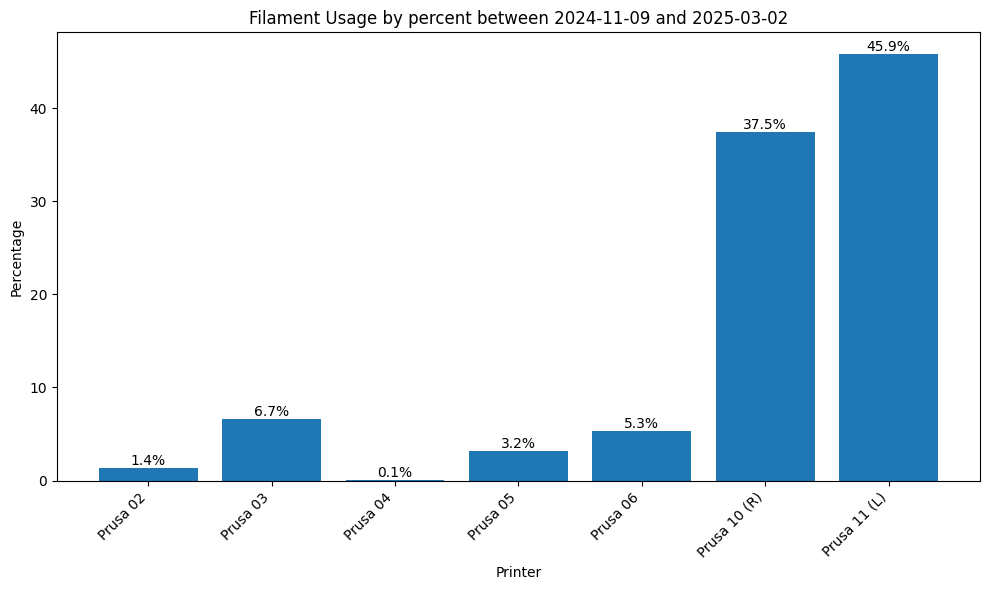

In [23]:
delta_hours_args = {
    "df": filament_diff,
    "start_date": start_date,
    "end_date": end_date,
    "base_filename": "printer_usage_delta_filaments_bar",
    "save_to_drive": SAVE_TO_DRIVE,
    "download_locally": DOWNLOAD_LOCALLY,
}

# we need a date column for filenaming purposes
filament_diff['date'] = end_date.date()

plot_difference_percent_bar(**delta_hours_args)

In [24]:
def plot_difference_percent_pie(df, start_date, end_date,
                                base_filename, save_to_drive, download_locally):
  """Plot the percentage difference between the two dates for each printer.

      df : Dataframe, assumed to have calculated Percentage column,
      and Date column. Index is the Printer.
      start_date and end_date - Datetime objects used solely for the title.
      printers with 0% usage are excluded.
  """

  start_date_label = start_date.strftime("%Y-%m-%d")
  end_date_label = end_date.strftime("%Y-%m-%d")

  # Filter out printers with 0% usage
  df = df[filament_diff['Percentage'] != 0]

  # Create the pie chart
  plt.figure(figsize=(8, 8))  # Adjust figure size as needed
  plt.pie(filament_diff['Percentage'], labels=filament_diff.index, autopct='%1.1f%%', startangle=90)
  plt.title(f"Filament Usage by percent between {start_date_label} and {end_date_label}")
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.tight_layout() # prevent label overlap

  usage_filename = create_filename_from_last_date(df, base_filename, "pdf")
  save_and_show_plot(usage_filename, save_to_drive, download_locally)


Plot saved to /content/printer_usage_delta_filaments_pie_250302.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

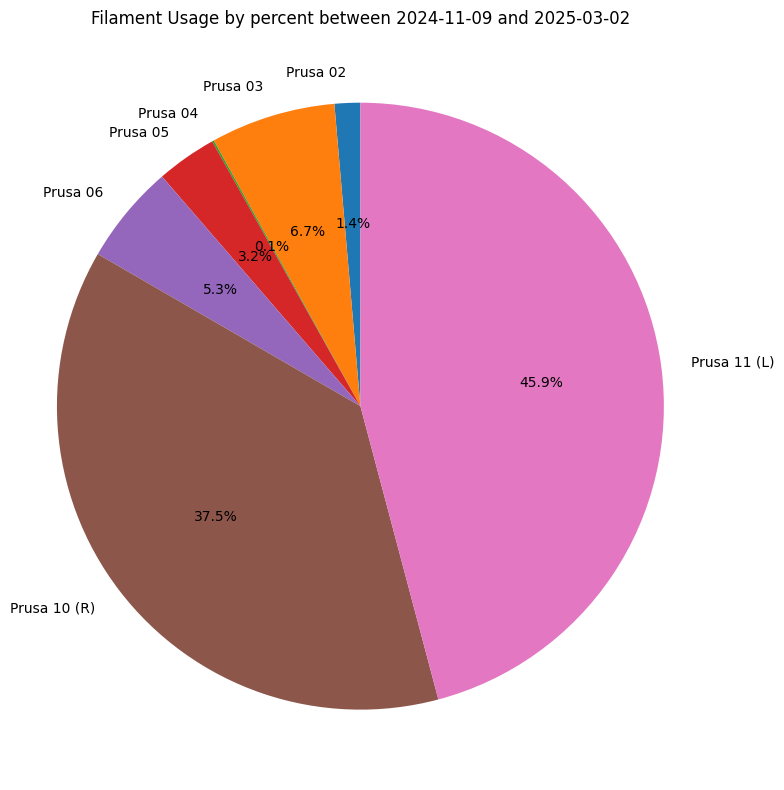

In [25]:
delta_hours_args = {
    "df": filament_diff,
    "start_date": start_date,
    "end_date": end_date,
    "base_filename": "printer_usage_delta_filaments_pie",
    "save_to_drive": SAVE_TO_DRIVE,
    "download_locally": DOWNLOAD_LOCALLY,
}
plot_difference_percent_pie(**delta_hours_args)

## Total Usage - Hours and Filament

In [26]:
# a function to plot the total values of the desired column, ignoring dates

def plot_printer_total_sums(df, col_name, y_label,  base_filename, save_to_drive, download_locally):
  """Plot the total values of the desired column."""

  # Group by printer and sum total_hours
  printer_sums = df.groupby('printer')[col_name].sum().round(1)
  last_date = get_last_date(df)

  # Create the bar graph
  plt.figure(figsize=(10, 6))  # Adjust figure size as needed
  plt.bar(printer_sums.index, printer_sums.values)
  plt.xlabel('Printer')
  plt.ylabel(y_label)
  plt.title(f'{y_label} per active Printer as of {last_date.strftime("%Y-%m-%d")}')

  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping

  # add data labels to each bar
  for i, v in enumerate(printer_sums.values):
      plt.text(i, v, f'{v:,}', ha='center', va='bottom')

  usage_filename = create_filename_from_last_date(df, base_filename, "pdf")
  save_and_show_plot(usage_filename, save_to_drive, download_locally)



Plot saved to /content/printer_usage_total_hours_250302.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

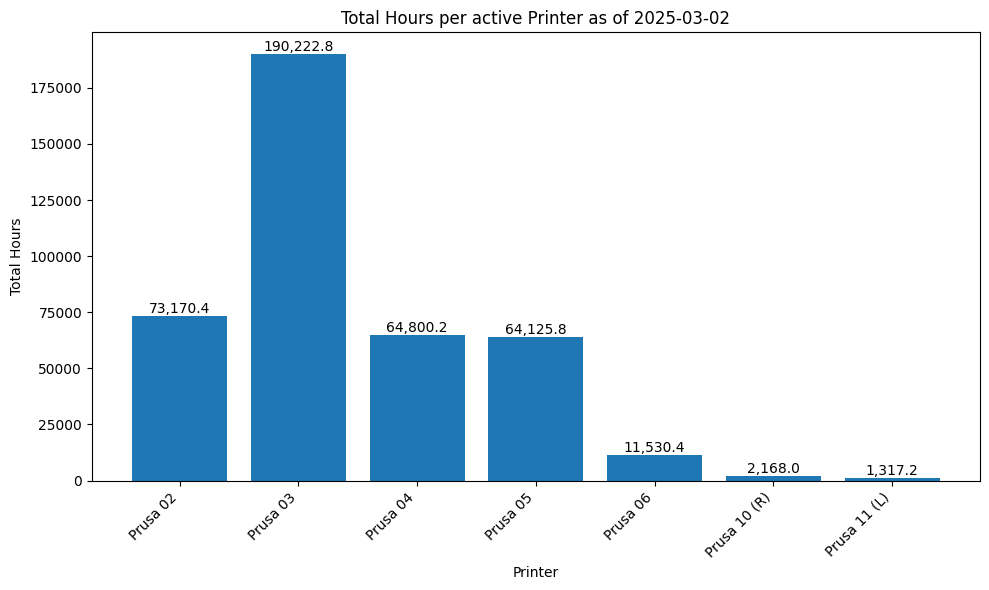

In [27]:
total_hours_args = {
    "df": df,
    "col_name": "total_hours",
    "y_label": "Total Hours",
    "base_filename": "printer_usage_total_hours",
    "save_to_drive": SAVE_TO_DRIVE,
    "download_locally": DOWNLOAD_LOCALLY,
}
plot_printer_total_sums(**total_hours_args)

Plot saved to /content/printer_usage_total_filament_250302.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

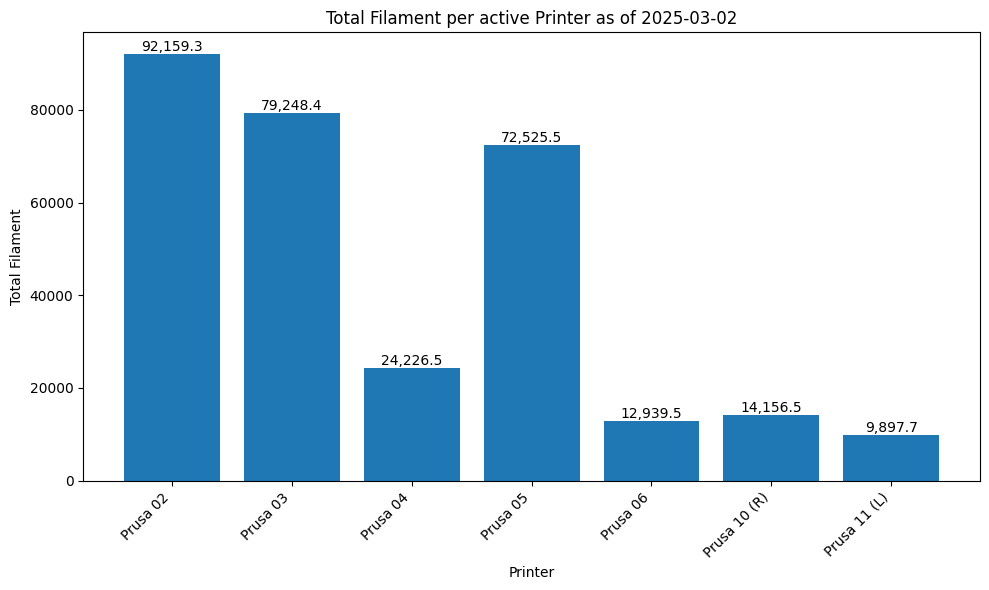

In [28]:
total_filament_args = {
    "df": df,
    "col_name": "filament (m)",
    "y_label": "Total Filament",
    "base_filename": "printer_usage_total_filament",
    "save_to_drive": SAVE_TO_DRIVE,
    "download_locally": DOWNLOAD_LOCALLY,
}
plot_printer_total_sums(**total_filament_args)

## Usage over time - Hours and Filament

In [29]:
# a similar function to generate values per date, giving us something akin to a time-series

def plot_printer_per_date_sums(df, col_name, y_label,  base_filename, save_to_drive, download_locally):
  """Plot the values of the desired column, aggregated by printer and date."""

  # Group data by printer and date, then sum total_hours
  printer_date_hours = df.groupby(['printer', 'date'])[col_name].sum().unstack()

  # Create the bar graph
  ax = printer_date_hours.plot(kind='bar', figsize=(15, 8))  # Adjust figure size as needed
  plt.xlabel('Printer')
  plt.ylabel(y_label)

  last_date = get_last_date(df)
  plt.title(f'{y_label} per Printer per Date as of {last_date.strftime("%Y-%m-%d")}')

  plt.xticks(rotation=45, ha='right')

  # Add data labels with diagonal orientation
  for p in ax.patches:
      ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', rotation=45, xytext=(5, 5), textcoords='offset points')

  y_max = printer_date_hours.values.max()
  plt.ylim(0, y_max * 1.15) # Extend y-axis by 15% to create room for the labels

  plt.tight_layout()  # Adjust layout to prevent labels from overlapping

  usage_filename = create_filename_from_last_date(df, base_filename, "pdf")
  save_and_show_plot(usage_filename, save_to_drive, download_locally)


Plot saved to /content/printer_usage_hours_per_date_250302.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

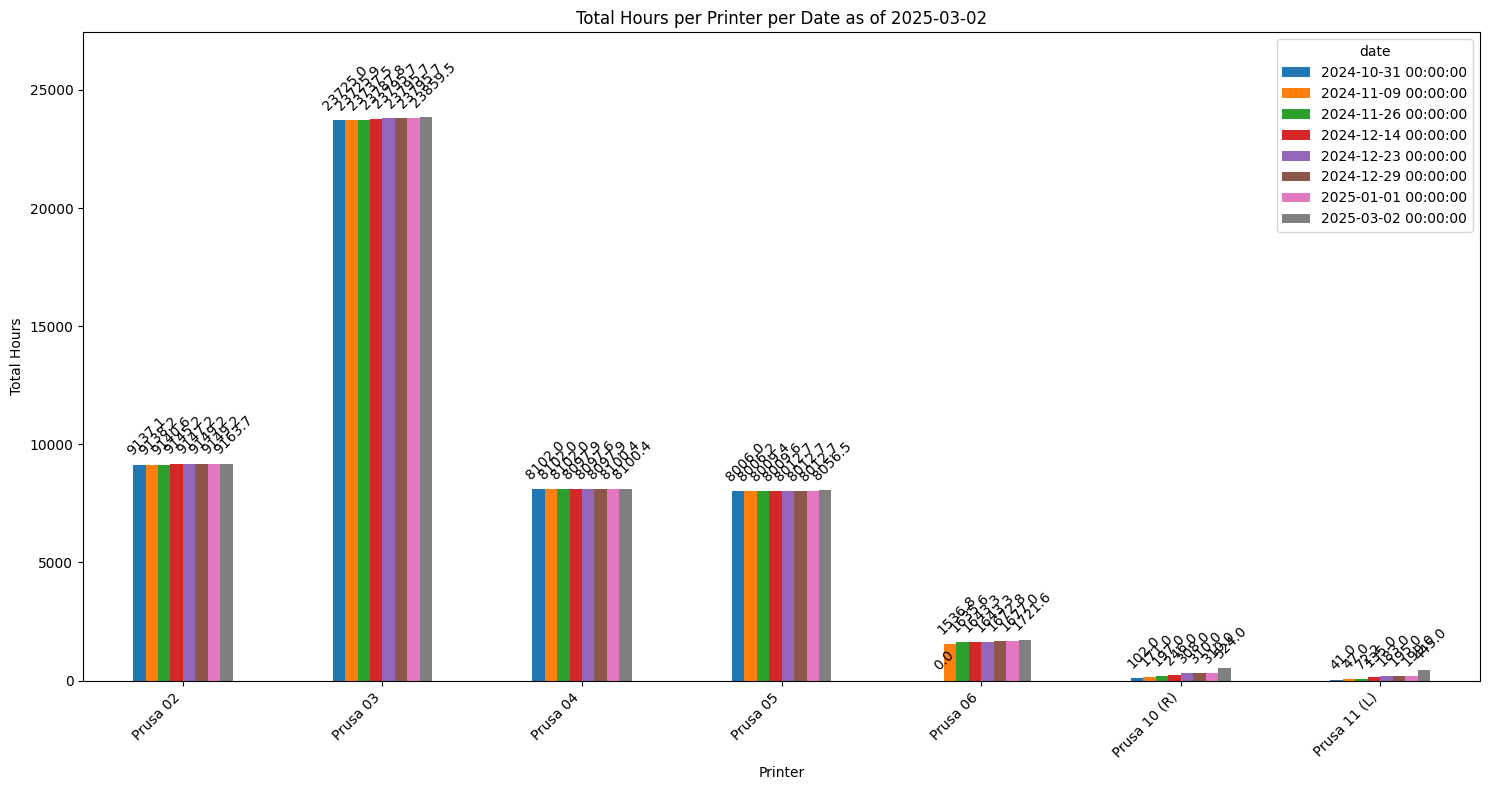

In [30]:
per_date_hours_args = {
    "df": df,
    "col_name": "total_hours",
    "y_label": "Total Hours",
    "base_filename": "printer_usage_hours_per_date",
    "save_to_drive": SAVE_TO_DRIVE,
    "download_locally": DOWNLOAD_LOCALLY,
}
plot_printer_per_date_sums(**per_date_hours_args)

Plot saved to /content/printer_usage_filament_per_date_250302.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

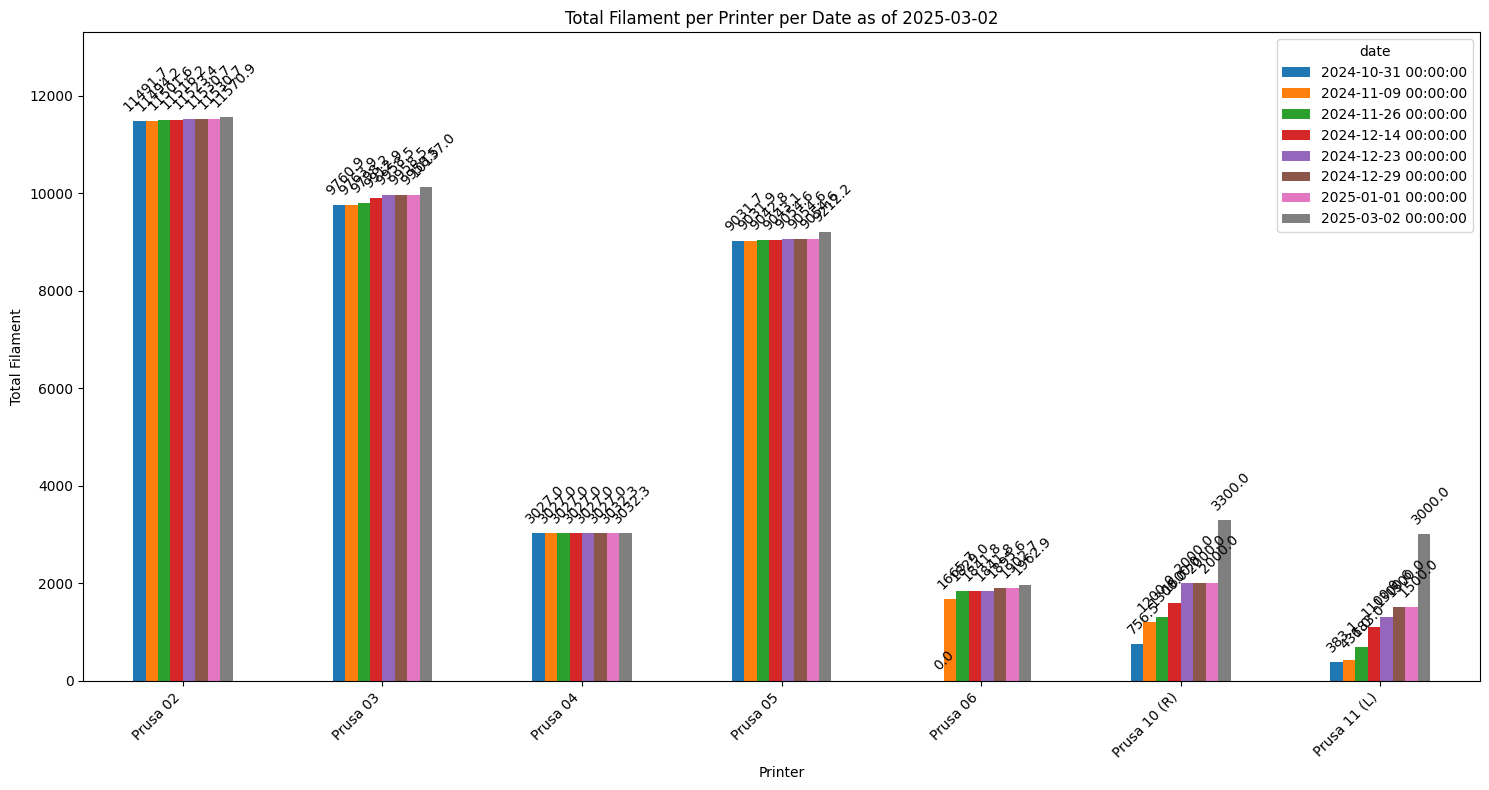

In [31]:
per_date_filament_args = {
    "df": df,
    "col_name": "filament (m)",
    "y_label": "Total Filament",
    "base_filename": "printer_usage_filament_per_date",
    "save_to_drive": SAVE_TO_DRIVE,
    "download_locally": DOWNLOAD_LOCALLY,
}
plot_printer_per_date_sums(**per_date_filament_args)

--30--